# Synthetic Calibration Manuscript Figures 

In [2]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

r2rmse MD1 AxesSubplot(0.125,0.125;0.168478x0.755) 0 True re
r2rmse MD1 AxesSubplot(0.327174,0.125;0.168478x0.755) 1 True re
r2rmse MD1 AxesSubplot(0.529348,0.125;0.168478x0.755) 2 True re
r2rmse MD1 AxesSubplot(0.731522,0.125;0.168478x0.755) 3 True re


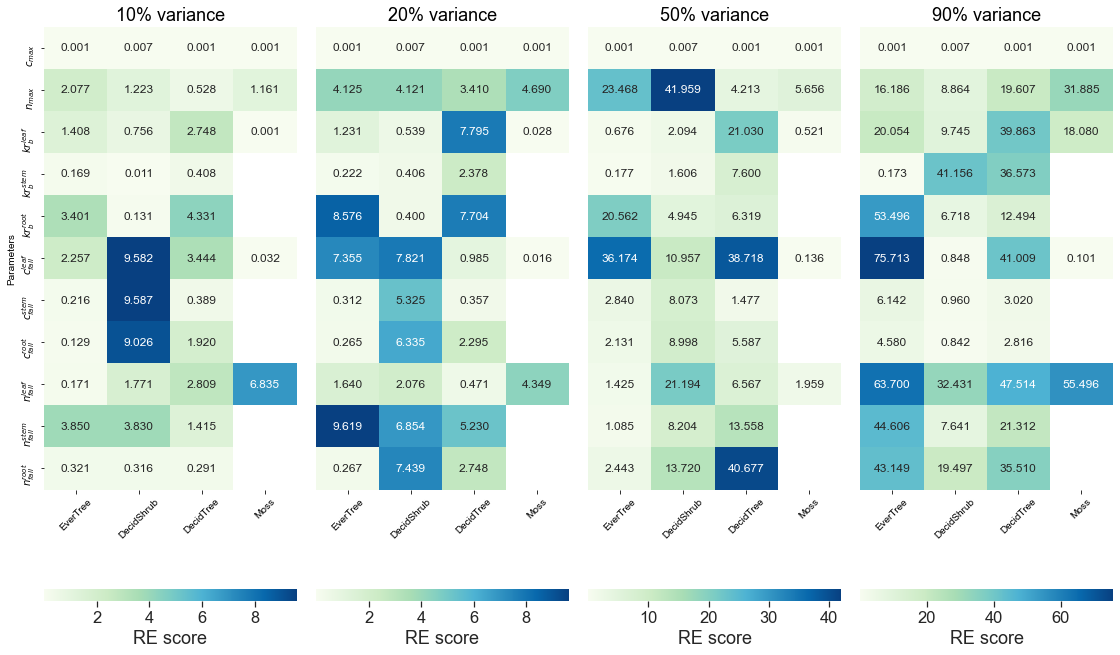

In [3]:
def read_samples_resutls(paths,pathr):
    df_param = pd.read_csv(paths)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]

def get_by_index(zscore,index_list):
    return pd.Series([zscore[0][iname] for iname in index_list])

def rmse(x,x_true):
    MSE = np.square(np.subtract(x.mean(),x_true)) 
    df_z = pd.DataFrame(np.sqrt(MSE))
    df_z.index = x.columns
    return df_z

def relative_error(x,x_true):
    MAE = np.subtract(x.mean(),x_true)
    df_z = pd.DataFrame(abs(100*MAE/x_true))
    df_z.index = x.columns
    return df_z

def site_metric_matrix(metric_matrix, metric, ax, id, param, error, colorb=True):
    print( metric, ax, id, param, error)
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''
    cases=[10,20,50,90]
    n_rows, n_cols = metric_matrix.shape
    sns.set(font_scale=1.5)  

    if error=='RMSE':
        cbar_label='RMSE score'
    else:
        cbar_label='RE score'

    if colorb:
        sns.heatmap(metric_matrix, cmap="GnBu", 
                    annot=True, fmt=".3f",
                   cbar_kws={'label': cbar_label,"orientation": 'horizontal'},
                   annot_kws={"fontsize":12}, ax=ax)
    else:
        sns.heatmap(metric_matrix, cmap="coolwarm",
                    annot=True, fmt=".3f",
                   cbar=False,
                   cbar_kws={'label': cbar_label,"orientation": 'horizontal'},
                   annot_kws={"fontsize":12}, ax=ax)

    if id==0:  
        if param:     
            ax.set_ylabel('Parameters')
        else:
            ax.set_ylabel('Targets')
        if error=='RMSE':
            ax.set(xlabel=None)
            ax.set_xticks([])
    elif id==1:  
        if error=='RMSE':
            ax.set(xlabel=None)
            ax.set_xticks([])
        ax.set(ylabel=None)
        ax.set_yticks([])
    elif id==2:
        if error=='RMSE':
            ax.set(xlabel=None)
            ax.set_xticks([])
        ax.set(ylabel=None)
        ax.set_yticks([])
    elif id==3:  
        if error=='RMSE':
            ax.set(xlabel=None)
            ax.set_xticks([])
        ax.set(ylabel=None)
        ax.set_yticks([])

    ax.tick_params(axis='x', rotation=45)
    ax.set_title(str(cases[id])+'% variance')

    return

def plot_MD1(ax, id, case=10, emetric='RMSE', param=False):
    # metric: zscore, nmae_score
    #GPP
    site='MD1'
    #rmetric='RMSE'
    nelem=10
    order=True
    rmetric='r2rmse'
    error=emetric
    
    if case==20:
        path='20_percent/csv-files/'
        model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
        params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
    elif case==10:
        path='10_percent/csv/'
        model='out-cmax-gpp-md1-r-10-EJ.finalresults.csv'
        params='param-cmax-gpp-md1-r-10-EJ.finalresults.csv'
    elif case==50:
        path='50_percent/csv/'
        model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
        params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
    elif case==90:    
        path='90_percent/csv/'
        model='out-cmax-gpp-md1-r-90-EJ.finalresults.csv'
        params='param-cmax-gpp-md1-r-90-EJ.finalresults.csv'
    elif case==1010: 
        path='10_10_percent/'
        model='out-cmax-gpp-md1-r-10-10-EJ.finalresults.csv'
        params='param-cmax-gpp-md1-r-10-10-EJ.finalresults.csv'   
    elif case==2510: 
        path='25_10_percent/'
        model='out-cmax-gpp-md1-r-25-10-EJ.finalresults.csv'
        params='param-cmax-gpp-md1-r-25-10-EJ.finalresults.csv'   
        
    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header = ['GPP0','GPP1','GPP2','GPP3']
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = ['cmax0','cmax1','cmax2','cmax3']
    df_param.columns = param_header
    df_model

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    #xparams_MD1
 
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()

    if param==False:
        #GPP_tar_MD1=df_model.iloc[-1,:]
        #rmse_GPP_MD1=rmse(y_sort,GPP_tar_MD1) 
        if error=='re':
            rmse_GPP_MD1 = relative_error(y_sort,df_model.iloc[-1,:]) 
        else:
            rmse_GPP_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 

        gpp_md1=get_by_index(rmse_GPP_MD1, model_header)
    else: 
        cmax_true_params_MD1 = [381.19, 113.93, 210.48, 93.31]
        x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
        if error=='re':
            rmse_cmax_MD1 = relative_error(x_sort,cmax_true_params_MD1) 
        else:
            rmse_cmax_MD1 = rmse(x_sort,cmax_true_params_MD1) 
        #rmse_cmax_MD1=rmse(x_sort,cmax_true_params_MD1)
        cmax_md1=get_by_index(rmse_cmax_MD1, param_header)
 

    if case==10:
        model='out-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
        params='param-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
    elif case == 20:
        model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
        params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    elif case == 50:
        model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
        params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    elif case==90: 
        model='out-nmax-krb-npp-vegc-md1-r-90-EJ.finalresults.csv'
        params='param-nmax-krb-npp-vegc-md1-r-90-EJ.finalresults.csv'
    elif case==1010: 
        path='10_10_percent/'
        model='out-nmax-krb-npp-vegc-md1-r-10-10-EJ.finalresults.csv'
        params='param-nmax-krb-npp-vegc-md1-r-10-10-EJ.finalresults.csv'   
    elif case==2510: 
        path='25_10_percent/'
        model='out-nmax-krb-npp-vegc-md1-r-25-10-EJ.finalresults.csv'
        params='param-nmax-krb-npp-vegc-md1-r-25-10-EJ.finalresults.csv'   

    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03'
                    ]
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = ['nmax0','nmax1','nmax2','nmax3',
                'krb00','krb01','krb02','krb03',\
                'krb10','krb11','krb12',\
                'krb20','krb21','krb22']
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order).iloc[:5,:-6].copy()

    if param==False:
        #rmse_nmax_krb_VEGC_MD1=rmse(y_sort,df_model.iloc[-1,:]) 
        if error=='re':
            rmse_nmax_krb_VEGC_MD1 = relative_error(y_sort,df_model.iloc[-1,:]) 
        else:
            rmse_nmax_krb_VEGC_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 
        
        npp_MD1=get_by_index(rmse_nmax_krb_VEGC_MD1,['NPP0','NPP1','NPP2','NPP3'])
        vegc_krb_leaf=get_by_index(rmse_nmax_krb_VEGC_MD1,['VEGC00','VEGC01','VEGC02','VEGC03'])
        vegc_krb_stem=get_by_index(rmse_nmax_krb_VEGC_MD1,['VEGC10','VEGC11','VEGC12'])
        vegc_krb_root=get_by_index(rmse_nmax_krb_VEGC_MD1,['VEGC20','VEGC21','VEGC22'])
    else:
        nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
            -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
        x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
        #rmse_nmax_krb_MD1=rmse(x_sort,nmax_krb_true_params) 
        if error=='re':
            rmse_nmax_krb_MD1 = relative_error(x_sort,nmax_krb_true_params) 
        else:
            rmse_nmax_krb_MD1 = rmse(x_sort,nmax_krb_true_params) 

        nmax_MD1=get_by_index(rmse_nmax_krb_MD1,['nmax0','nmax1','nmax2','nmax3'])
        krb_leaf=get_by_index(rmse_nmax_krb_MD1,['krb00','krb01','krb02','krb03'])
        krb_stem=get_by_index(rmse_nmax_krb_MD1,['krb10','krb11','krb12'])
        krb_root=get_by_index(rmse_nmax_krb_MD1,['krb20','krb21','krb22'])

    if case==10:
        model='out-cfall-vegc-md1-r-10-EJ.finalresults.csv'
        params='param-cfall-vegc-md1-r-10-EJ.finalresults.csv'
    elif case == 20:
        model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
        params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
    elif case == 50:
        model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
        params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
    elif case == 90:
        model='out-cfall-vegc-md1-r-90-EJ.finalresults.csv'
        params='param-cfall-vegc-md1-r-90-EJ.finalresults.csv'
    elif case==1010: 
        path='10_10_percent/'
        model='out-cfall-vegc-md1-r-10-10-EJ.finalresults.csv'
        params='param-cfall-vegc-md1-r-10-10-EJ.finalresults.csv' 
    elif case==2510: 
        path='25_10_percent/'
        model='out-cfall-vegc-md1-r-25-10-EJ.finalresults.csv'
        params='param-cfall-vegc-md1-r-25-10-EJ.finalresults.csv' 

    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03'
                    ]
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = [
                'cfall00','cfall01','cfall02','cfall03',\
                'cfall10','cfall11','cfall12',\
                'cfall20','cfall21','cfall22']
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    
    if param==False:
        #rmse_cfall_VEGC_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 
        if error=='re':
            rmse_cfall_VEGC_MD1 = relative_error(y_sort,df_model.iloc[-1,:]) 
        else:
            rmse_cfall_VEGC_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 
    
        vegc_cfall_leaf=get_by_index(rmse_cfall_VEGC_MD1,['VEGC00','VEGC01','VEGC02','VEGC03'])
        vegc_cfall_stem=get_by_index(rmse_cfall_VEGC_MD1,['VEGC10','VEGC11','VEGC12'])
        vegc_cfall_root=get_by_index(rmse_cfall_VEGC_MD1,['VEGC20','VEGC21','VEGC22'])
    else: 
        cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                        0.003590, 0.005149, 0.001171, 0.026025]
        x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
        #rmse_cfall_MD1 = rmse(x_sort,cfall_true_params) 
        if error=='re':
            rmse_cfall_MD1 = relative_error(x_sort,cfall_true_params) 
        else:
            rmse_cfall_MD1 = rmse(x_sort,cfall_true_params) 
        cfall_leaf=get_by_index(rmse_cfall_MD1,['cfall00','cfall01','cfall02','cfall03'])
        cfall_stem=get_by_index(rmse_cfall_MD1,['cfall10','cfall11','cfall12'])
        cfall_root=get_by_index(rmse_cfall_MD1,['cfall20','cfall21','cfall22'])

    if case==10:
        model='out-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
        params='param-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
    elif case == 20:
        model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
        params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    elif case == 50:
        model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
        params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    elif case == 90:
        model='out-nfall-npp-vegc-vegn-md1-r-90-EJ.finalresults.csv'
        params='param-nfall-npp-vegc-vegn-md1-r-90-EJ.finalresults.csv'
    elif case==1010: 
        path='10_10_percent/'
        model='out-nfall-npp-vegc-vegn-md1-r-10-10-EJ.finalresults.csv'
        params='param-nfall-npp-vegc-vegn-md1-r-10-10-EJ.finalresults.csv' 
    elif case==2510:
        path='25_10_percent/'
        model='out-nfall-npp-vegc-vegn-md1-r-25-10-EJ.finalresults.csv'
        params='param-nfall-npp-vegc-vegn-md1-r-25-10-EJ.finalresults.csv' 

    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03',\
                    'VEGN00','VEGN10','VEGN20',\
                    'VEGN01','VEGN11','VEGN21',\
                    'VEGN02','VEGN12','VEGN22',\
                    'VEGN03'
                    ]
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = [
                'nfall00','nfall01','nfall02','nfall03',\
                'nfall10','nfall11','nfall12',\
                'nfall20','nfall21','nfall22']
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    
    if param==False:
        #rmse_nfall_VEGC_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 
        if error=='re':
            rmse_nfall_VEGC_MD1 = relative_error(y_sort,df_model.iloc[-1,:]) 
        else:
            rmse_nfall_VEGC_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 

        vegn_nfall_leaf=get_by_index(rmse_nfall_VEGC_MD1,['VEGC00','VEGC01','VEGC02','VEGC03'])
        vegn_nfall_stem=get_by_index(rmse_nfall_VEGC_MD1,['VEGC10','VEGC11','VEGC12'])
        vegn_nfall_root=get_by_index(rmse_nfall_VEGC_MD1,['VEGC20','VEGC21','VEGC22'])
    else:
        nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                            0.005220, 0.003280, 0.007283, 0.007607]
        x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
        #rmse_nfall_MD1 = rmse(x_sort,nfall_true_params)
        if error=='re':
            rmse_nfall_MD1 = relative_error(x_sort,nfall_true_params) 
        else:
            rmse_nfall_MD1 = rmse(x_sort,nfall_true_params) 
        nfall_leaf=get_by_index(rmse_nfall_MD1,['nfall00','nfall01','nfall02','nfall03'])
        nfall_stem=get_by_index(rmse_nfall_MD1,['nfall10','nfall11','nfall12'])
        nfall_root=get_by_index(rmse_nfall_MD1,['nfall20','nfall21','nfall22'])

    if param==False:
        z_eml_matrix = pd.DataFrame({
            'GPP': gpp_md1,
            'NPP': npp_MD1,
            '$C_{leaf}(kr_b)$': vegc_krb_leaf, '$C_{stem}(kr_b)$': vegc_krb_stem, '$C_{root}(kr_b)$': vegc_krb_root,
            '$C_{leaf}(c_{fall})$': vegc_cfall_leaf, '$C_{stem}(c_{fall})$': vegc_cfall_stem, '$C_{root}(c_{fall})$': vegc_cfall_root,
            '$N_{leaf}$': vegn_nfall_leaf, '$N_{stem}$': vegn_nfall_stem, '$N_{root}$': vegn_nfall_root
                })
    else:
        z_eml_matrix = pd.DataFrame({
            '$c_{max}$': cmax_md1,
            '$n_{max}$': nmax_MD1,
            '$kr_{b}^{leaf}$': krb_leaf, '$kr_{b}^{stem}$': krb_stem, '$kr_{b}^{root}$': krb_root,
            '$c_{fall}^{leaf}$': cfall_leaf, '$c_{fall}^{stem}$': cfall_stem, '$c_{fall}^{root}$': cfall_root,
            '$n_{fall}^{leaf}$': nfall_leaf, '$n_{fall}^{stem}$': nfall_stem, '$n_{fall}^{root}$': nfall_root
                })
    
    z_eml_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']
    
    site_metric_matrix(z_eml_matrix.T, rmetric+' '+site, ax, id, param, error)

fig, axs = plt.subplots(1, 4, figsize=(16, 10))  # Create a 2x2 grid of subplot
# Flatten the 2x2 array of axes to a 1D array for easy iteration
axs = axs.flatten()
cases=[10,20,50,90]
for i in range(4):
    plot_MD1(axs[i], i, case=cases[i], emetric='re',param=True)

plt.tight_layout()  # Adjust subplots to fit into the figure area



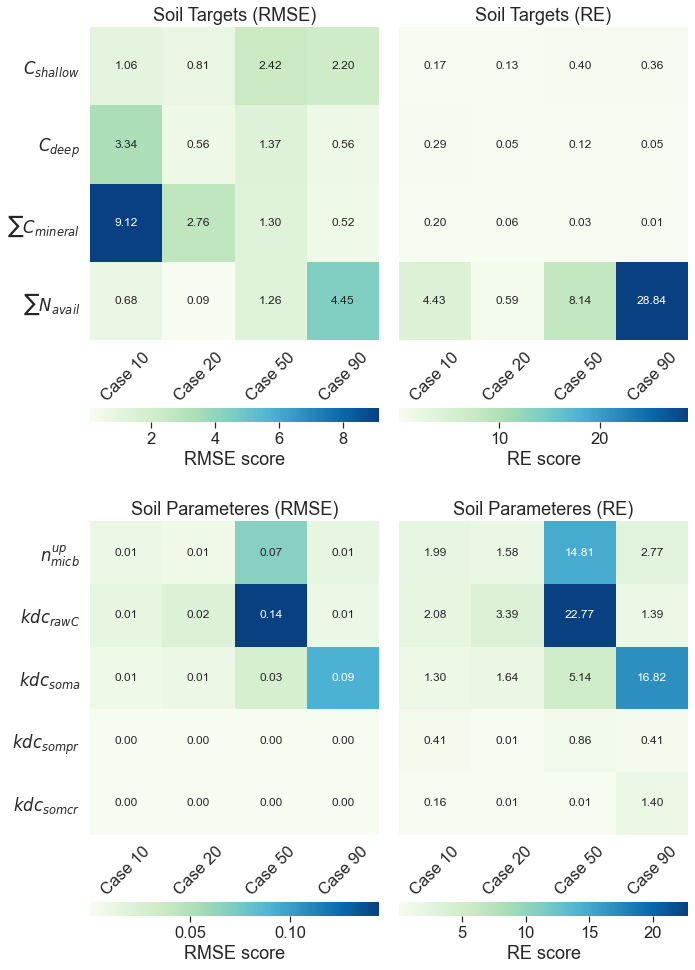

In [4]:
def soil_metric_matrix(ax, param, error='rmse', colorb=True):
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''

    if param==False:
        metric_matrix = pd.DataFrame({
            'Case 10': get_csoil(case=10, rmetric='r2rmse', error=error, param=param),
            'Case 20': get_csoil(case=20, rmetric='r2rmse', error=error, param=param),
            'Case 50': get_csoil(case=50, rmetric='r2rmse', error=error, param=param),
            'Case 90': get_csoil(case=90, rmetric='r2rmse', error=error, param=param)
                })
        metric_matrix.index=['$C_{shallow}$','$C_{deep}$','$\sum C_{mineral}$','$\sum N_{avail}$']
    else:
        metric_matrix = pd.DataFrame({
            'Case 10': get_csoil(case=10, rmetric='r2rmse', error=error, param=param),
            'Case 20': get_csoil(case=20, rmetric='r2rmse', error=error, param=param),
            'Case 50': get_csoil(case=50, rmetric='r2rmse', error=error, param=param),
            'Case 90': get_csoil(case=90, rmetric='r2rmse', error=error, param=param)
                })
        metric_matrix.index=['$n^{up}_{micb}$', '$kdc_{rawC}$', '$kdc_{soma}$', '$kdc_{sompr}$', '$kdc_{somcr}$']

    n_rows, n_cols = metric_matrix.shape
    sns.set(font_scale=1.5)  

    if error=='rmse':
        cbar_label='RMSE score'
    else:
        cbar_label='RE score'

    if colorb:
        sns.heatmap(metric_matrix, cmap="GnBu", 
                    annot=True, fmt=".2f",
                   cbar_kws={'label': cbar_label,"orientation": 'horizontal'},
                   annot_kws={"fontsize":12}, ax=ax)
    else:
        sns.heatmap(metric_matrix, cmap="coolwarm",
                    annot=True, fmt=".2f",
                   cbar=False,
                   cbar_kws={'label': cbar_label,"orientation": 'horizontal'},
                   annot_kws={"fontsize":12}, ax=ax)
   
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)
    if param:
        if error=='rmse':
            ax.set_title('Soil Parameteres (RMSE)')

        else:
            ax.set_title('Soil Parameteres (RE)')
            ax.set(ylabel=None)
            ax.set_yticks([])
    else:
        if error=='rmse':
            ax.set_title('Soil Targets (RMSE)')

        else: 
            ax.set_title('Soil Targets (RE)')
            ax.set(ylabel=None)
            ax.set_yticks([])



    return

def get_csoil(case=10, rmetric='r2rmse', error='rmse', param=True):
    #case=10
    #rmetric='r2rmse'
    #param=True
    nelem=10
    order=True

    if case==20:
        path='20_percent/csv-files/'
        model='out-csoil-md1-r-EJ.finalresults.csv'
        params='param-csoil-md1-r-EJ.finalresults.csv'
    elif case==10:
        path='10_percent/csv/'
        model='out-test_csoil_consil.csv'
        params='param-test_csoil_consil.csv'
    elif case==50:
        path='50_percent/csv/'
        model='out-csoil-md1-r-EJ-50.finalresults.csv'
        params='param-csoil-md1-r-EJ-50.finalresults.csv'
    elif case==90:    
        path='90_percent/csv/'
        model='out-config-csoil-md1-10-test.csv'
        params='param-config-csoil-md1-10-test.csv'

    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)

    if case==50:
        model_header =  ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
    else:
        model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03',\
                    'VEGN00','VEGN10','VEGN20',\
                    'VEGN01','VEGN11','VEGN21',\
                    'VEGN02','VEGN12','VEGN22',\
                    'VEGN03',   
                    'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                    
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
                
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()

    if param==False:
        if error=='re':
            rmse_csoil_MD1 = relative_error(y_sort,df_model.iloc[-1,:]) 
        else:
            rmse_csoil_MD1 = rmse(y_sort,df_model.iloc[-1,:]) 
        csoil=get_by_index(rmse_csoil_MD1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
    else: 
        true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
                0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
                0.54,     # kdcsoma:   0.58
                0.002,    # kdcsompr:   
                0.00007]  # kdcsomcr:
        x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
        if error=='re':
            rmse_csparams = relative_error(x_sort,true_params) 
        else:
            rmse_csparams = rmse(x_sort,true_params) 
        csoil=get_by_index(rmse_csparams,param_header)

    return csoil
 
#get_csoil(case=10, rmetric='r2rmse', param=False)
#plt.subplots(figsize=(6, 9))  # Create a 2x2 grid of subplot
#soil_metric_matrix(param=False, error='re')


fig, axs = plt.subplots(2, 2, figsize=(10, 14))  # Create a 2x2 grid of subplot
# Flatten the 2x2 array of axes to a 1D array for easy iteration
axs = axs.flatten()
err=['rmse','re','rmse','re']
i=0
vparam=False
for er in err:
    if i>1:
        vparam=True
    soil_metric_matrix(axs[i], param=vparam, error=er)
    i+=1

plt.tight_layout()  # Adjust subplots to fit into the figure area